# Importing the necessary libraries and dependencies

In [1]:
#Importing libraries and dependencies
import pandas as pd
import numpy as np
#from sklearn.impute import SimpleImputer
#from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error, classification_report
##=from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.stattools import adfuller
from numpy import log
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import wordcloud 
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#pd.set_option('display.float_format', lambda x: '%.9f' % x)

# Loading the datasets

In [2]:
df_churn = pd.read_csv("Telco-Customer-Churn.csv")

# Data Exploration

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df_churn.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [5]:
#Checking for missing values
missing_values = df_churn.isnull().sum().sort_values(ascending =True)
missing_values

customerID          0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
TotalCharges        0
OnlineBackup        0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
OnlineSecurity      0
Churn               0
dtype: int64

In [6]:
#Checking for empty spaces ' ' 
#df_churn[df_churn.PaymentMethod == ' ']
#df_churn[df_churn.Churn == ' ']
#df_churn[df_churn.MonthlyCharges == ' ']
df_churn[df_churn.TotalCharges == ' ']

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [7]:
#Change column datatype to float
df_churn['TotalCharges'].replace([' '],[0],inplace= True)
df_churn['TotalCharges']=df_churn['TotalCharges'].astype(float)

In [8]:
# Add column to replace values for SeniorCitizen as a categorical feature
df_churn['Senior_Citizen'] = df_churn['SeniorCitizen'].replace({1:'Yes',0:'No'})


<AxesSubplot:>

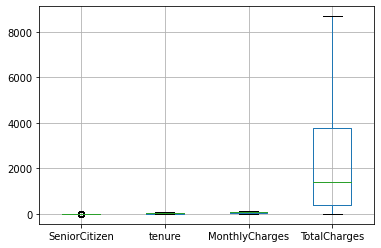

In [9]:
df_churn.boxplot()

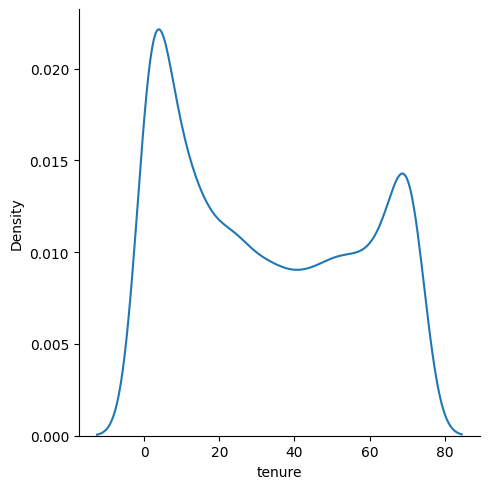

In [10]:
#sns.distplot(df_churn['tenure','MonthlyCharges',])
sns.displot(data=df_churn, x="tenure", kind="kde")
plt.show()

In [11]:
df_churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7038         Yes         Yes             Yes        One year              Yes   
7039          No         Yes             Yes        One year              Yes   
7040          No          No              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   
7042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7038               Mailed check          84.80      1990.50     No   
7039    Credit card (automatic)         103.20      7362.90     No   
7040           Electronic check          29.60       346.45     No   
7041               Mailed check          74.40       306.60    Yes   
7042  Bank transfer (automatic)         105.65      6844.50     No   

      Senior_Citizen  
0                 No  
1                 No  
2                 No  
3                 No  
4                 No  
...              ...  
7038              No  
7039              No  
7040              No  
7041             Yes  
7042              No  

[7043 rows x 22 columns]

# Hypothesis and Questions

The following questions and hypothesis will be answered

1. What is the gender distribution of customers
2. What percentage of customers are senior citizens
3. What percentage of customers have partners
4. What percentage of customers have dependant
5. What percentage of customers have more than 1 service subscription
6. What is the churn rate by the above distributions
7. What is the distribution of customers by Contract type
8. What is the distribution of customers by Payment Method
9. Is there a correlation between charges and churn


**Basic statistics

No     5174
Yes    1869
Name: Churn, dtype: int64

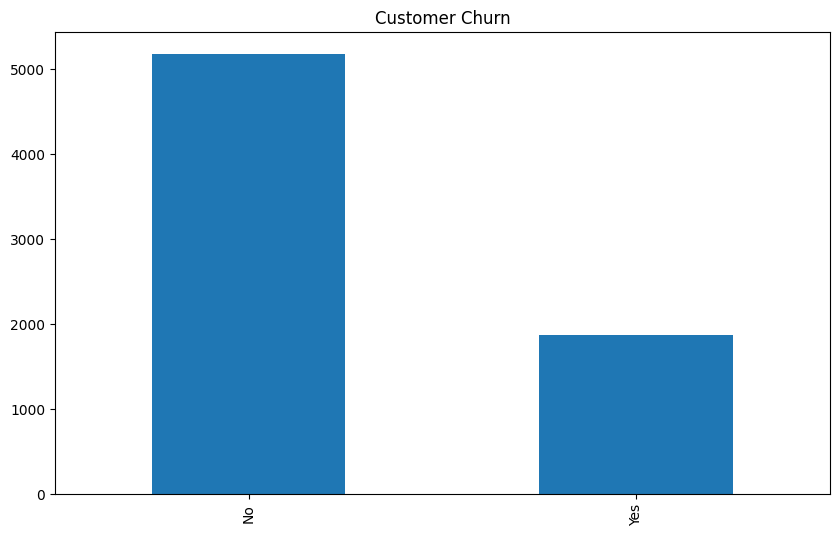

In [12]:
#Churn Numbers
attrition = df_churn['Churn'].value_counts()
plt.figure(figsize=(10,6))
attrition.plot(kind='bar').set_title('Customer Churn')
attrition

In [13]:
#Attrition Rate
churned =1869/(1869 + 5174)*100
stayed = 5174/(1869 + 5174)*100
print(round(churned,1), '% of Customers Churned')
print(round(stayed,1), '% of Customers Stayed')

26.5 % of Customers Churned
73.5 % of Customers Stayed


In [14]:
#Monthly Charges Aggregation
df_churn.MonthlyCharges.min(), df_churn.MonthlyCharges.max(),df_churn.MonthlyCharges.sum()


(18.25, 118.75, 456116.6)

In [15]:
df_churn.TotalCharges.min(), df_churn.TotalCharges.max()

(0.0, 8684.8)

gender
Female    3488
Male      3555
Name: customerID, dtype: int64

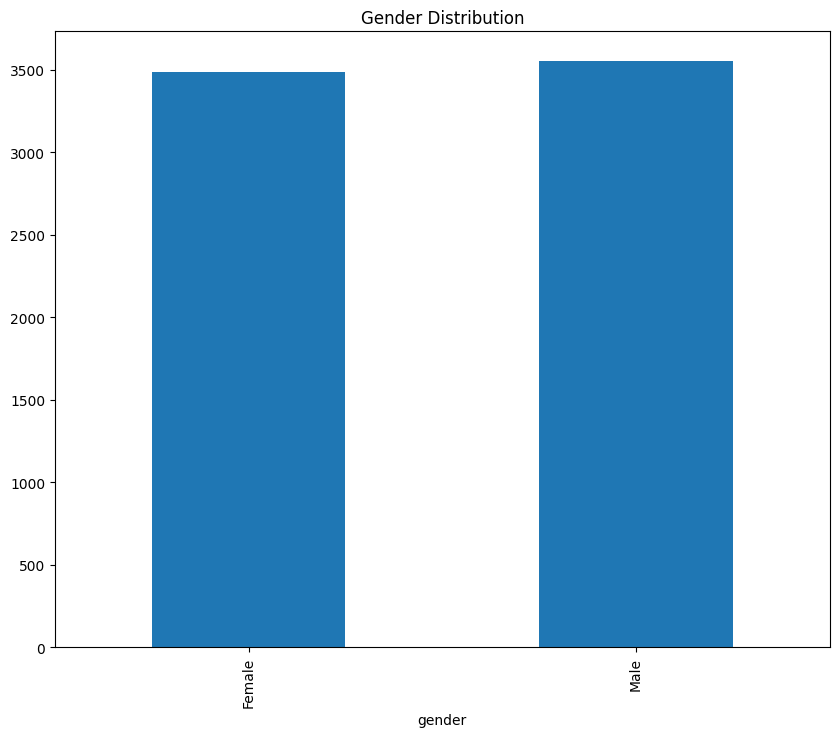

In [16]:
#Gender distribution of customers
gender_distribution = df_churn.groupby(['gender'])['customerID'].count()
plt.figure(figsize=(10,8))
gender_distribution.plot(kind='bar').set_title('Gender Distribution')
#gender_distribution.plot.bar()
gender_distribution

Senior_Citizen
No     5901
Yes    1142
Name: customerID, dtype: int64

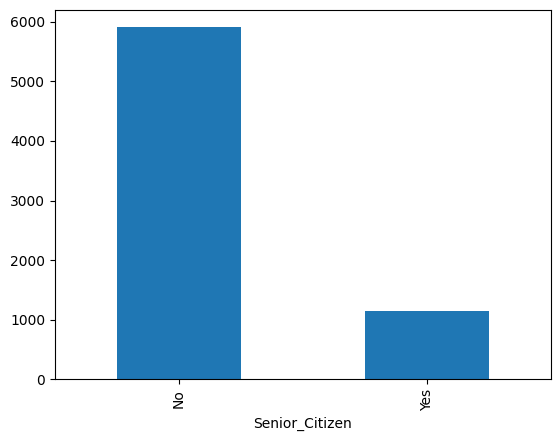

In [17]:
#Distribution of customers by Senior Citizenship
Senior_Citizen_distribution = df_churn.groupby(['Senior_Citizen'])['customerID'].count()
Senior_Citizen_distribution.plot.bar()
Senior_Citizen_distribution

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: customerID, dtype: int64

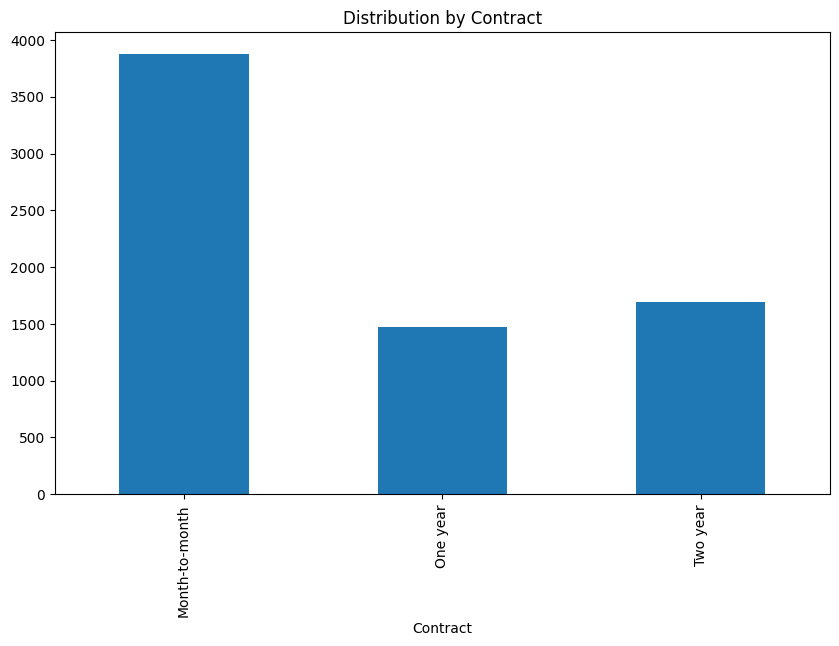

In [18]:
#Distribution of customers by Contract
Contract_distribution = df_churn.groupby(['Contract'])['customerID'].count()
#Contract_distribution.plot.bar()
plt.figure(figsize=(10,6))
Contract_distribution.plot(kind='bar').set_title('Distribution by Contract')
Contract_distribution

PaymentMethod
Credit card (automatic)      1522
Bank transfer (automatic)    1544
Mailed check                 1612
Electronic check             2365
Name: customerID, dtype: int64

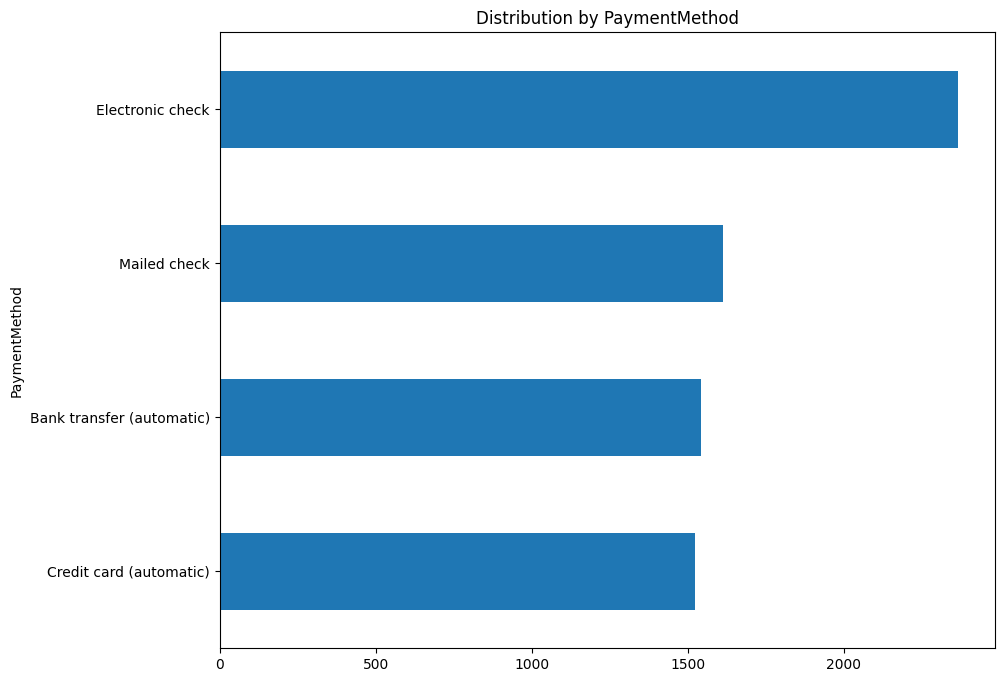

In [19]:
#Distribution of customers by Payment Method
PaymentMethod_distribution = df_churn.groupby(['PaymentMethod'])['customerID'].count().sort_values(ascending=True)
plt.figure(figsize=(10,8))
PaymentMethod_distribution.plot(kind='barh').set_title('Distribution by PaymentMethod')
#PaymentMethod_distribution.plot.barh()
PaymentMethod_distribution

Female    939
Male      930
Name: gender, dtype: int64

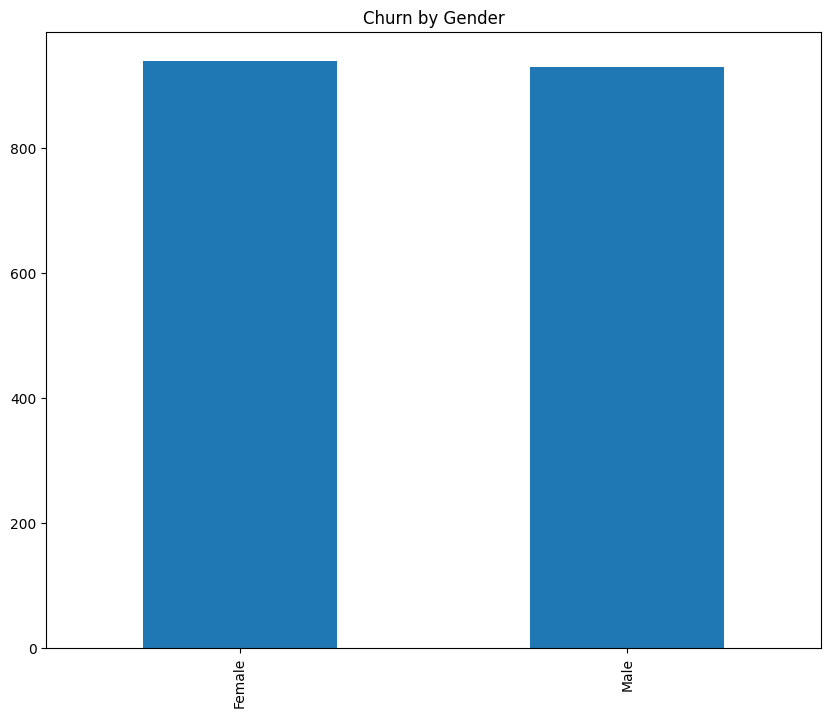

In [20]:
#Churn by Gender
gender=df_churn[df_churn.Churn == 'Yes']['gender'].value_counts()
#gender.plot.bar()
plt.figure(figsize=(10,8))
gender.plot(kind='bar').set_title('Churn by Gender')
gender

<AxesSubplot:>

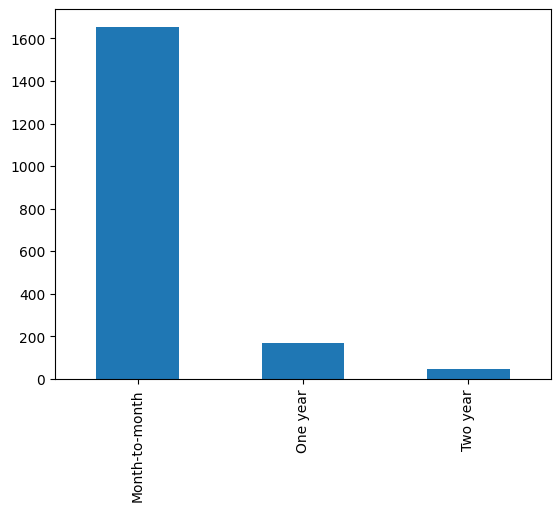

In [21]:
#Churn by Contract Type
contract_type=df_churn[df_churn.Churn == 'Yes']['Contract'].value_counts()
contract_type.plot.bar()

No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64

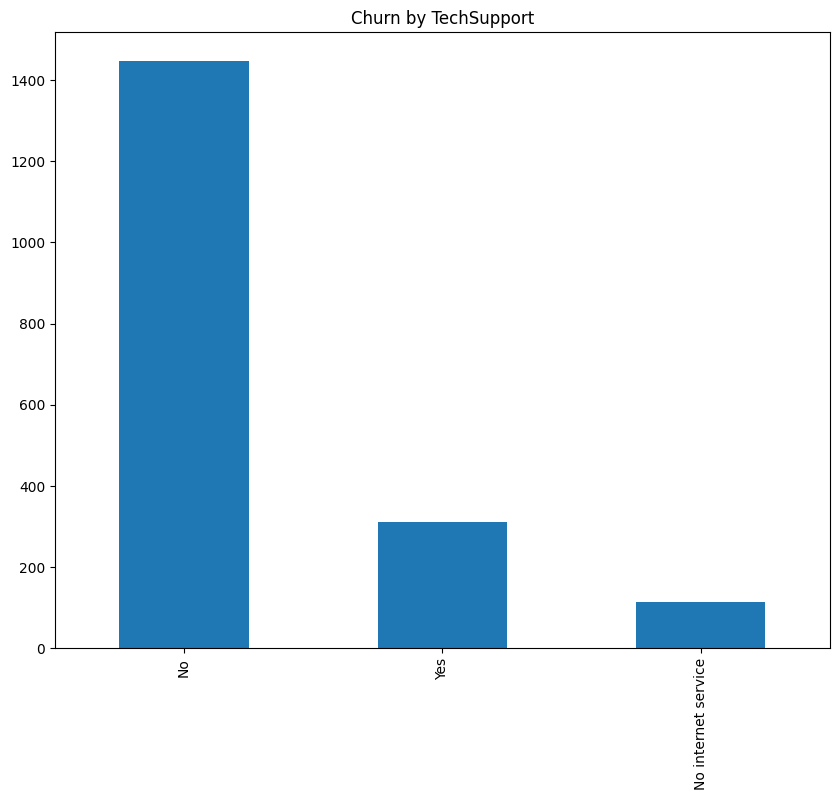

In [22]:
#Churn by Tech Support 
payment_method =df_churn[df_churn.Churn == 'Yes']['TechSupport'].value_counts()
plt.figure(figsize=(10,8))
payment_method.plot(kind='bar').set_title('Churn by TechSupport')
#payment_method.plot.bar()
payment_method

No     1543
Yes     326
Name: Dependents, dtype: int64

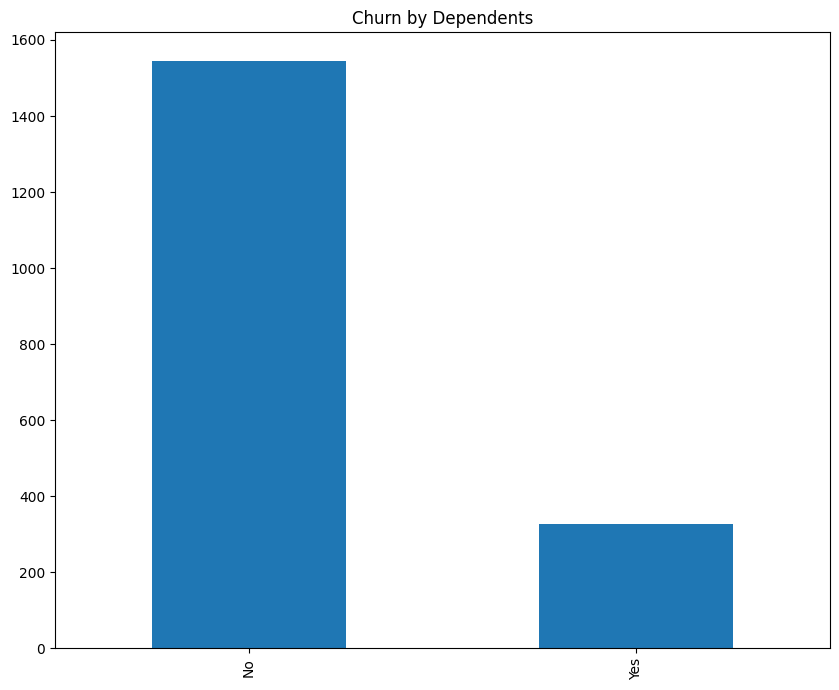

In [23]:
#Churn by Dependents
dependents =df_churn[df_churn.Churn == 'Yes']['Dependents'].value_counts()
plt.figure(figsize=(10,8))
dependents.plot(kind='bar').set_title('Churn by Dependents')
#payment_method.plot.bar()
dependents

<AxesSubplot:>

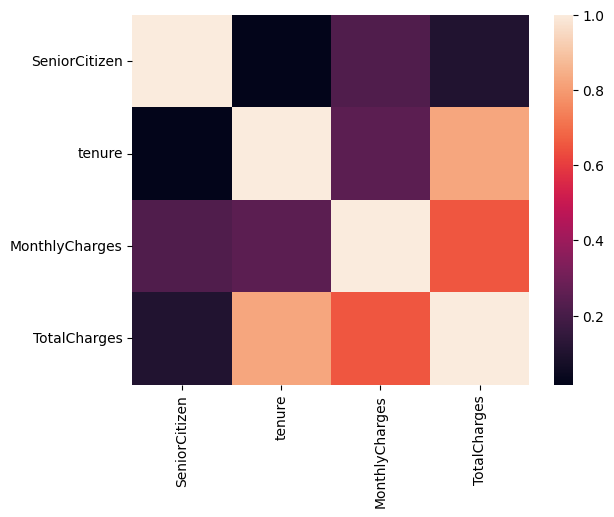

In [24]:
sns.heatmap(df_churn.corr(method='pearson'))

<AxesSubplot:>

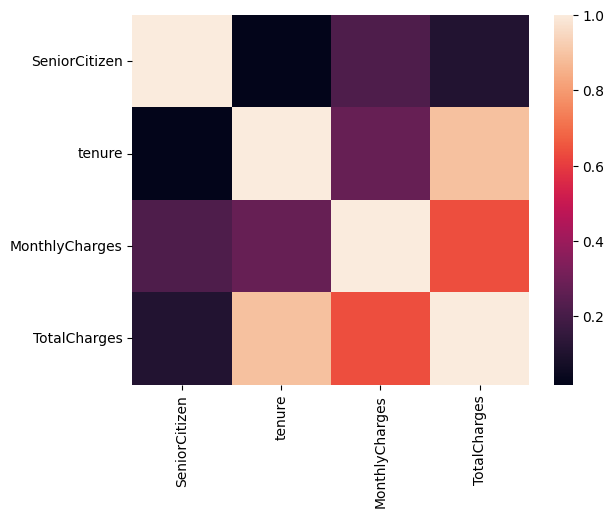

In [25]:
sns.heatmap(df_churn.corr(method='spearman'))

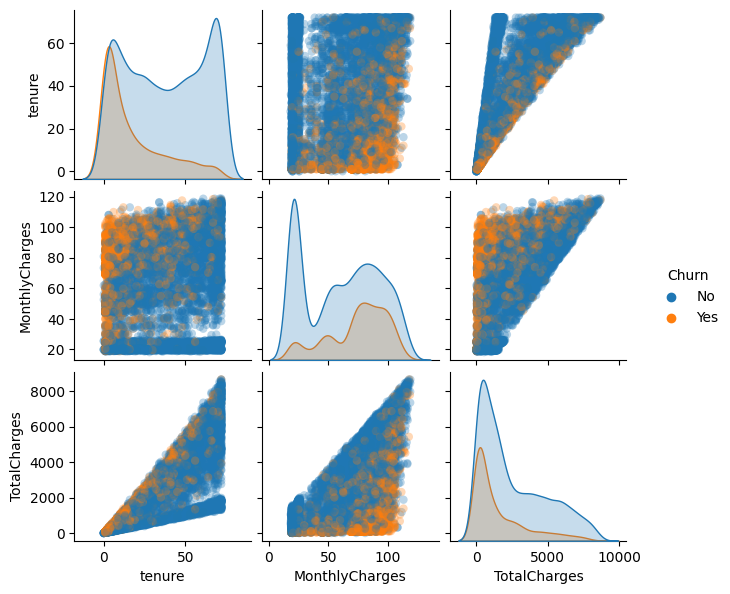

In [26]:
sns.pairplot(df_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], 
             hue='Churn', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)
#sns.pairplot(df_churn.corr())
#df_churn['TotalCharges'].replace([' '],[0],inplace= True)
#df_churn['TotalCharges']=df_churn['TotalCharges'].astype(float)

P-Value for Anova is:  2.127211613245422e-63
F-statistic for Anova is:  288.2789610222117


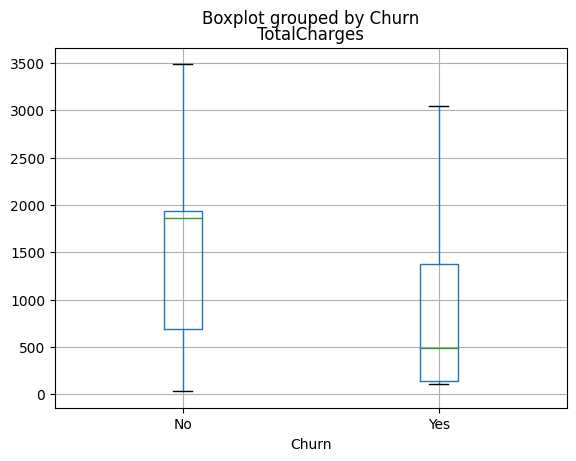

In [27]:
#Regression analysis using ANOVA TEST     
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

Data = df_churn.loc[:,['Churn','TotalCharges']]
ColumnNames =['Churn','TotalCharges']
test_Data=pd.DataFrame(data=Data,columns=ColumnNames)
CategoryGroupLists=test_Data.groupby('Churn')['TotalCharges'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
print('F-statistic for Anova is: ', AnovaResults[0])

#creating boxplot of points
test_Data.head(10).boxplot(column=['TotalCharges'], by='Churn', )
plt.show()

P-Value for Anova is:  2.7066456068950115e-60
F-statistic for Anova is:  273.4637042077133


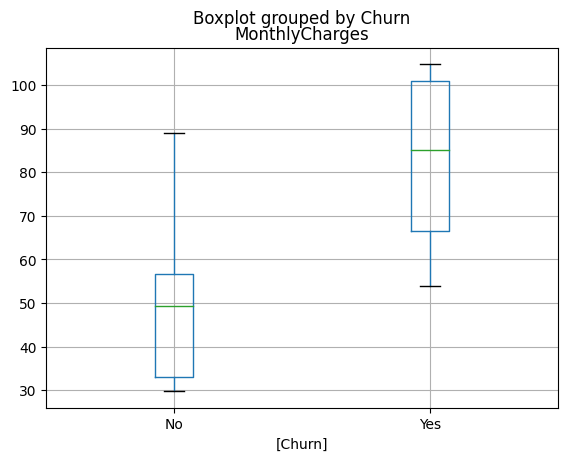

In [28]:
#Regression analysis using ANOVA TEST     
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

Data = df_churn.loc[:,['Churn','MonthlyCharges']]
ColumnNames =['Churn','MonthlyCharges']
test_Data=pd.DataFrame(data=Data,columns=ColumnNames)
CategoryGroupLists=test_Data.groupby('Churn')['MonthlyCharges'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
print('F-statistic for Anova is: ', AnovaResults[0])

#creating boxplot of points
test_Data.head(10).boxplot(column=['MonthlyCharges'], by=[ 'Churn',])
plt.show()

P-Value for Anova is:  7.999057960610892e-205
F-statistic for Anova is:  997.2680104991438


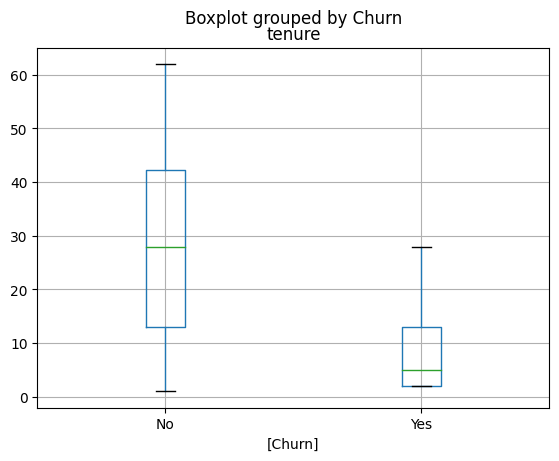

In [29]:
#Regression analysis using ANOVA TEST     
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

Data = df_churn.loc[:,['Churn','tenure']]
ColumnNames =['Churn','tenure']
test_Data=pd.DataFrame(data=Data,columns=ColumnNames)
CategoryGroupLists=test_Data.groupby('Churn')['tenure'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
print('F-statistic for Anova is: ', AnovaResults[0])

#creating boxplot of points
test_Data.head(10).boxplot(column=['tenure'], by=[ 'Churn',])
plt.show()

In [30]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Feature Engineering
Lets start by dropping the customerID and Senior_Citizen columns

In [31]:

df_churn.drop(columns=['customerID','Senior_Citizen'],inplace = True)
#df_churn.drop('customerID',inplace = True)

In [32]:
df_churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Encoding Categorical Columns

Since our models will perform better with numeric values,we encode the categorical columns using panda's get_dummies function as we dont have ordinal columns.
We also change "Yes" and "No" in the Churn column to 0 and 1 respectively.

In [33]:
#Replace "Yes, No"  in the Churn column with 0,1
df_churn.Churn.replace({"Yes":0, "No":1}, inplace = True)

In [34]:
#One-hot-encoding categorical columns
#ask if ----drop_first = True
encoded_data1 = pd.get_dummies(df_churn, columns =['gender', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
 'PaperlessBilling', 'Contract'],drop_first = True)

encoded_data1.head(4)

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      1            0   
1              0      34           56.95       1889.50      1            1   
2              0       2           53.85        108.15      0            1   
3              0      45           42.30       1840.75      1            1   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                               1  ...                                0   
1                               0  ...                                0   
2                               0  ...                                0   
3                               1  ...                                0   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0                0                                    0                    0   
1                0                                    0                    0   
2                0                                    0                    0   
3                0                                    0                    0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   

   PaymentMethod_Mailed check  PaperlessBilling_Yes  Contract_One year  \
0                           0                     1                  0   
1                           1                     0                  1   
2                           1                     1                  0   
3                           0                     0                  1   

   Contract_Two year  
0                  0  
1                  0  
2                  0  
3                  0  

[4 rows x 31 columns]

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
onehot_data= enc.fit_transform(df_churn[['gender', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
 'PaperlessBilling', 'Contract']])
column_name = enc.get_feature_names_out(['gender', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
 'PaperlessBilling', 'Contract'])
encoded_categories =  pd.DataFrame(onehot_data.todense(), columns= column_name)
encoded_categories

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0             0.0          1.0             0.0               0.0   
1             1.0          0.0             0.0               1.0   
2             1.0          0.0             0.0               1.0   
3             1.0          0.0             0.0               0.0   
4             0.0          0.0             0.0               1.0   
...           ...          ...             ...               ...   
7038          1.0          1.0             1.0               1.0   
7039          0.0          1.0             1.0               1.0   
7040          0.0          1.0             1.0               0.0   
7041          1.0          1.0             0.0               1.0   
7042          1.0          0.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  \
0                                1.0                0.0   
1                                0.0                0.0   
2                                0.0                0.0   
3                                1.0                0.0   
4                                0.0                0.0   
...                              ...                ...   
7038                             0.0                1.0   
7039                             0.0                1.0   
7040                             1.0                0.0   
7041                             0.0                1.0   
7042                             0.0                0.0   

      InternetService_Fiber optic  InternetService_No  \
0                             0.0                 0.0   
1                             0.0                 0.0   
2                             0.0                 0.0   
3                             0.0                 0.0   
4                             1.0                 0.0   
...                           ...                 ...   
7038                          0.0                 0.0   
7039                          1.0                 0.0   
7040                          0.0                 0.0   
7041                          1.0                 0.0   
7042                          1.0                 0.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
0                                    0.0                 0.0  ...   
1                                    0.0                 1.0  ...   
2                                    0.0                 1.0  ...   
3                                    0.0                 1.0  ...   
4                                    0.0                 0.0  ...   
...                                  ...                 ...  ...   
7038                                 0.0                 1.0  ...   
7039                                 0.0                 0.0  ...   
7040                                 0.0                 1.0  ...   
7041                                 0.0                 0.0  ...   
7042                                 0.0                 1.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                                 0.0              0.0   
1                                 0.0              0.0   
2                                 0.0              0.0   
3                                 0.0              0.0   
4                                 0.0              0.0   
...                               ...              ...   
7038                              0.0              1.0   
7039                              0.0              1.0   
7040                              0.0              0.0   
7041                              0.0              0.0   
7042                              0.0              1.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                     0.0                  0.0   
1                                     0.0                  0.0   
2                                     0.0                  0.0   
3    

In [36]:
encoded_categories

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0             0.0          1.0             0.0               0.0   
1             1.0          0.0             0.0               1.0   
2             1.0          0.0             0.0               1.0   
3             1.0          0.0             0.0               0.0   
4             0.0          0.0             0.0               1.0   
...           ...          ...             ...               ...   
7038          1.0          1.0             1.0               1.0   
7039          0.0          1.0             1.0               1.0   
7040          0.0          1.0             1.0               0.0   
7041          1.0          1.0             0.0               1.0   
7042          1.0          0.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  \
0                                1.0                0.0   
1                                0.0                0.0   
2                                0.0                0.0   
3                                1.0                0.0   
4                                0.0                0.0   
...                              ...                ...   
7038                             0.0                1.0   
7039                             0.0                1.0   
7040                             1.0                0.0   
7041                             0.0                1.0   
7042                             0.0                0.0   

      InternetService_Fiber optic  InternetService_No  \
0                             0.0                 0.0   
1                             0.0                 0.0   
2                             0.0                 0.0   
3                             0.0                 0.0   
4                             1.0                 0.0   
...                           ...                 ...   
7038                          0.0                 0.0   
7039                          1.0                 0.0   
7040                          0.0                 0.0   
7041                          1.0                 0.0   
7042                          1.0                 0.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
0                                    0.0                 0.0  ...   
1                                    0.0                 1.0  ...   
2                                    0.0                 1.0  ...   
3                                    0.0                 1.0  ...   
4                                    0.0                 0.0  ...   
...                                  ...                 ...  ...   
7038                                 0.0                 1.0  ...   
7039                                 0.0                 0.0  ...   
7040                                 0.0                 1.0  ...   
7041                                 0.0                 0.0  ...   
7042                                 0.0                 1.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                                 0.0              0.0   
1                                 0.0              0.0   
2                                 0.0              0.0   
3                                 0.0              0.0   
4                                 0.0              0.0   
...                               ...              ...   
7038                              0.0              1.0   
7039                              0.0              1.0   
7040                              0.0              0.0   
7041                              0.0              0.0   
7042                              0.0              1.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                     0.0                  0.0   
1                                     0.0                  0.0   
2                                     0.0                  0.0   
3    

In [37]:
df_numeric = df_churn[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
encoded_data = pd.concat([df_numeric,encoded_categories],axis=1)
encoded_data

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0                 0       1           29.85         29.85      1          0.0   
1                 0      34           56.95       1889.50      1          1.0   
2                 0       2           53.85        108.15      0          1.0   
3                 0      45           42.30       1840.75      1          1.0   
4                 0       2           70.70        151.65      0          0.0   
...             ...     ...             ...           ...    ...          ...   
7038              0      24           84.80       1990.50      1          1.0   
7039              0      72          103.20       7362.90      1          0.0   
7040              0      11           29.60        346.45      1          0.0   
7041              1       4           74.40        306.60      0          1.0   
7042              0      66          105.65       6844.50      1          1.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0             1.0             0.0               0.0   
1             0.0             0.0               1.0   
2             0.0             0.0               1.0   
3             0.0             0.0               0.0   
4             0.0             0.0               1.0   
...           ...             ...               ...   
7038          1.0             1.0               1.0   
7039          1.0             1.0               1.0   
7040          1.0             1.0               0.0   
7041          1.0             0.0               1.0   
7042          0.0             0.0               1.0   

      MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                                1.0  ...                              0.0   
1                                0.0  ...                              0.0   
2                                0.0  ...                              0.0   
3                                1.0  ...                              0.0   
4                                0.0  ...                              0.0   
...                              ...  ...                              ...   
7038                             0.0  ...                              0.0   
7039                             0.0  ...                              0.0   
7040                             1.0  ...                              0.0   
7041                             0.0  ...                              0.0   
7042                             0.0  ...                              0.0   

      StreamingTV_Yes  StreamingMovies_No internet service  \
0                 0.0                                  0.0   
1                 0.0                                  0.0   
2                 0.0                                  0.0   
3                 0.0                                  0.0   
4                 0.0                                  0.0   
...               ...                                  ...   
7038              1.0                                  0.0   
7039              1.0                                  0.0   
7040              0.0                                  0.0   
7041              0.0                                  0.0   
7042              1.0                                  0.0   

      StreamingMovies_Yes  PaymentMethod_Credit card (automatic)  \
0                     0.0                                    0.0   
1                     0.0                                    0.0   
2                     0.0                                    0.0   
3                     0.0                                    0.0   
4                     0.0                                    0.0   
...                   ...                                    ...   
7038                  1.0                                    0.0   
7039                  1.0                                    1.0   
7040                  0.0                                    0.0   
7041      

In [38]:
# Visualizing the correlation among features
fig = px.imshow(encoded_data.corr(method='pearson'), text_auto=True, width=900, height= 800)
fig.show()


<AxesSubplot:>

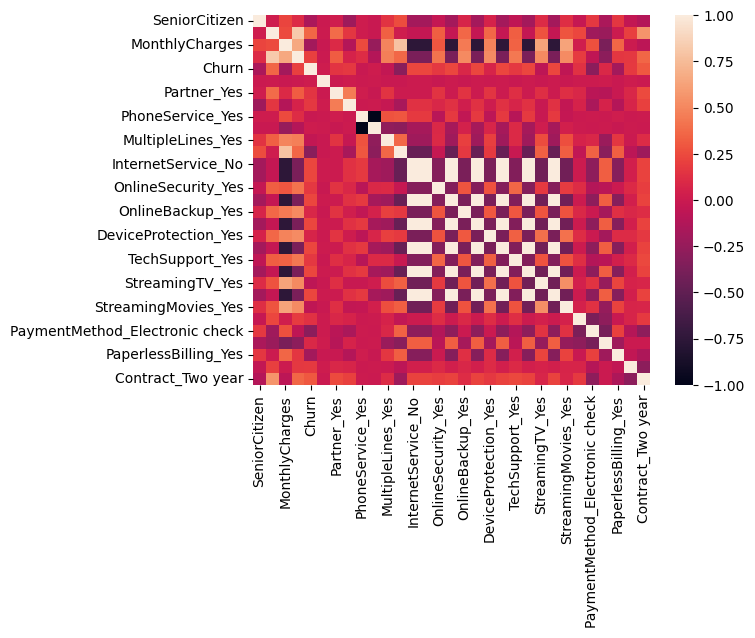

In [39]:
#Feature correlation
sns.heatmap(encoded_data.corr(method='pearson'))

Since we want to predict customer churn, we will use the churn column as our target variables and use the rest of the columns as our predictor variables. 

In [40]:
#Spliting data into target feature and predicting features.

target_feature = encoded_data.drop('Churn', axis = 1)
predict_feature = pd.DataFrame(encoded_data['Churn'])

In [41]:
predict_feature

Churn
0         1
1         1
2         0
3         1
4         0
...     ...
7038      1
7039      1
7040      1
7041      0
7042      1

[7043 rows x 1 columns]

# Feature Scaling

In order to adjust our features to a common scale, we will perform feature scaling on our predictive variables. We will use both StandardScaler and MinMaxScaler to see which will perfom better on our model.

In [42]:
#standardization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Scalling using StandardScaler
#scaler = StandardScaler()
#fit_transform data, change series to dataframe and keep column names
#std_scaler = pd.DataFrame(scaler.fit_transform(target_feature),columns= target_feature.columns)
#Scalling using MinMaxScaler
scaler1 = MinMaxScaler()
target_feature = pd.DataFrame(scaler1.fit_transform(target_feature), columns= target_feature.columns)

In [43]:
target_feature

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0               0.0  0.013889        0.115423      0.003437          0.0   
1               0.0  0.472222        0.385075      0.217564          1.0   
2               0.0  0.027778        0.354229      0.012453          1.0   
3               0.0  0.625000        0.239303      0.211951          1.0   
4               0.0  0.027778        0.521891      0.017462          0.0   
...             ...       ...             ...           ...          ...   
7038            0.0  0.333333        0.662189      0.229194          1.0   
7039            0.0  1.000000        0.845274      0.847792          0.0   
7040            0.0  0.152778        0.112935      0.039892          0.0   
7041            1.0  0.055556        0.558706      0.035303          1.0   
7042            0.0  0.916667        0.869652      0.788101          1.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0             1.0             0.0               0.0   
1             0.0             0.0               1.0   
2             0.0             0.0               1.0   
3             0.0             0.0               0.0   
4             0.0             0.0               1.0   
...           ...             ...               ...   
7038          1.0             1.0               1.0   
7039          1.0             1.0               1.0   
7040          1.0             1.0               0.0   
7041          1.0             0.0               1.0   
7042          0.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                                1.0                0.0  ...   
1                                0.0                0.0  ...   
2                                0.0                0.0  ...   
3                                1.0                0.0  ...   
4                                0.0                0.0  ...   
...                              ...                ...  ...   
7038                             0.0                1.0  ...   
7039                             0.0                1.0  ...   
7040                             1.0                0.0  ...   
7041                             0.0                1.0  ...   
7042                             0.0                0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                                 0.0              0.0   
1                                 0.0              0.0   
2                                 0.0              0.0   
3                                 0.0              0.0   
4                                 0.0              0.0   
...                               ...              ...   
7038                              0.0              1.0   
7039                              0.0              1.0   
7040                              0.0              0.0   
7041                              0.0              0.0   
7042                              0.0              1.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                     0.0                  0.0   
1                                     0.0                  0.0   
2                                     0.0                  0.0   
3                                     0.0                  0.0   
4                                     0.0                  0.0   
...                                   ...                  ...   
7038                                  0.0                  1.0   
7039                                  0.0                  1.0   
7040                                  0.0                  0.0   
7041                                  0.0                  0.0   
7042                                  0.0                  1.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                       0.0                             1.0   
1              

**Our predictive variables(Churn) contains imbalance data. There are 5174 entries for Yes and 1869 entries for No.
This has authomatically created minority and majority classes which can create problems with the accuracy of our model
due to this bias. We will upsample the minority class using sklearn resample()**

In [44]:
#Resampling predict feature to handle data imbalance
#create two different dataframe of majority and minority class 
df_majority = predict_feature[(predict_feature['Churn']==1)] 
df_minority = predict_feature[(predict_feature['Churn']==0)] 
df_minority

Churn
2         0
4         0
5         0
8         0
13        0
...     ...
7021      0
7026      0
7032      0
7034      0
7041      0

[1869 rows x 1 columns]

In [45]:
#Resampling predict feature to handle data imbalance
from sklearn.utils import resample


#down sample majority class
df_majority = resample(df_majority, 
                                 replace=False,    # sample with replacement
                                 n_samples= 3522, # to match majority class
                                 random_state=25)  # reproducible results
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 3521, # to match majority class
                                 random_state=25)  # reproducible results
# Combine majority class with upsampled minority class
df_resampled = pd.concat([df_minority_upsampled, df_majority])
#reseting dataframe index 
df_resampled.reset_index(drop=True, inplace=True)
df_resampled

Churn
0         0
1         0
2         0
3         0
4         0
...     ...
7038      1
7039      1
7040      1
7041      1
7042      1

[7043 rows x 1 columns]

In [46]:
df_resampled.value_counts()

Churn
1        3522
0        3521
dtype: int64

**From the output above, our data is now balanced. We have resampled our data to contain 3522 values for 1 and 3521 for 0 as compared to 5174 and 1869 respectively**

In [47]:
#Spliting data into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(target_feature, predict_feature, test_size = .20, random_state = 42)
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(df_resampled, predict_feature, test_size = .20)

# Modeling and Prediction
**We will build the following models and compare their accuracy, precision, recall and F1 & F2 scores:**
1. LogisticRegression Model
2. DecisionTree Model
3. RandomForest Model
4. XGB Classifier Model

# 1. LogisticRegression Model

In [48]:
#Fitting the model
from sklearn.linear_model import LogisticRegression
#logi_reg = LogisticRegression(random_state= 24 ,solver='liblinear')
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train.values.ravel())

#Predicting
y_pred = logi_reg.predict(X_test)


In [49]:
#Checking results
from sklearn import metrics
model= "LogisticRegression"
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision= metrics.precision_score(y_test, y_pred)
Recall= metrics.recall_score(y_test, y_pred)
F1= metrics.f1_score(y_test, y_pred) 
F2= metrics.fbeta_score(y_test, y_pred,beta=0.5) 

results = pd.DataFrame([[model,Accuracy,Precision,Recall,F1,F2]] ,columns=['Model','Accuracy','Precision','Recall','F1','F2'])

#models_result = models_result.append(results,ignore_index= True)
models_result= results
models_result.index += 1
models_result

Model  Accuracy  Precision    Recall        F1        F2
1  LogisticRegression  0.821859   0.861086  0.903475  0.881771  0.869242

In [50]:
report = classification_report(y_test, y_pred, target_names=['Churned','Stayed'])
print(report)

              precision    recall  f1-score   support

     Churned       0.69      0.60      0.64       373
      Stayed       0.86      0.90      0.88      1036

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



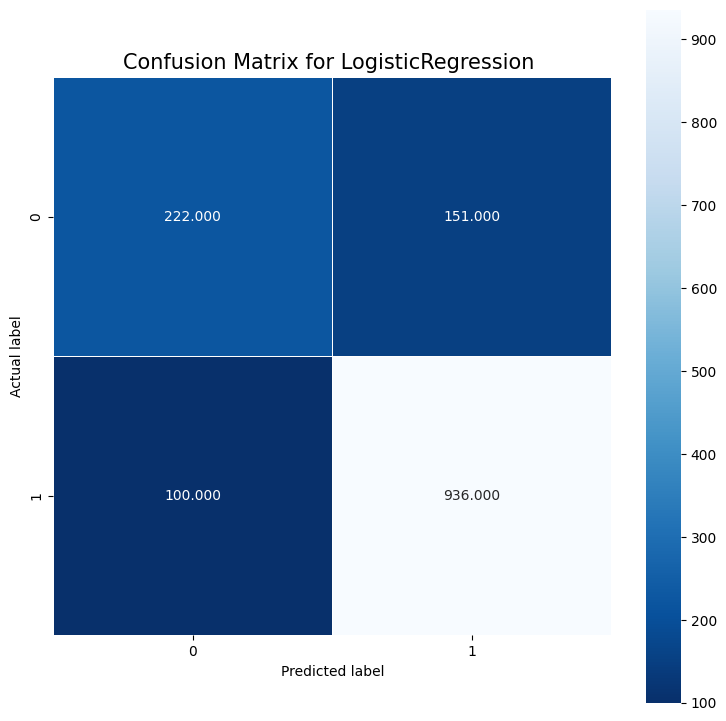

In [51]:
#Visualizing confusion metrix
Model = "LogisticRegression"
score = logi_reg.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for %s ' %(Model)
plt.title(all_sample_title, size = 15);

In [52]:
#Visualizing Feature Importance
feature_importance = logi_reg.coef_[0]
feature_importance = pd.DataFrame(feature_importance, index=target_feature.columns)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index':'Feature',0:'Score'}, inplace=True)
feature_importance.sort_values(by ='Score',ascending = False, inplace =True )
fig= px.bar(feature_importance, x='Feature',y ='Score')
fig.show()


# 2. DecisionTree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier
deci_tree = DecisionTreeClassifier(random_state=24)
#deci_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 4 , max_features=0.6)
deci_tree.fit(X_train, y_train)
#Predicting
y_pred_tree = deci_tree.predict(X_test)


In [54]:
#Checking results
from sklearn import metrics
model= "DecisionTreeClassifier"
Accuracy = metrics.accuracy_score(y_test, y_pred_tree)
Precision= metrics.precision_score(y_test, y_pred_tree)
Recall= metrics.recall_score(y_test, y_pred_tree)
F1= metrics.f1_score(y_test, y_pred_tree) 
F2= metrics.fbeta_score(y_test, y_pred_tree,beta=0.5) 

results = pd.DataFrame([[model,Accuracy,Precision,Recall,F1,F2]] ,columns=['Model','Accuracy','Precision','Recall','F1','F2'])
models_result = models_result.append(results,ignore_index= True)
models_result

Model  Accuracy  Precision    Recall        F1        F2
0      LogisticRegression  0.821859   0.861086  0.903475  0.881771  0.869242
1  DecisionTreeClassifier  0.710433   0.804854  0.800193  0.802517  0.803918

In [55]:
report1 = classification_report(y_test, y_pred_tree, target_names=['Churned','Stayed'])
print(report1)

              precision    recall  f1-score   support

     Churned       0.45      0.46      0.46       373
      Stayed       0.80      0.80      0.80      1036

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



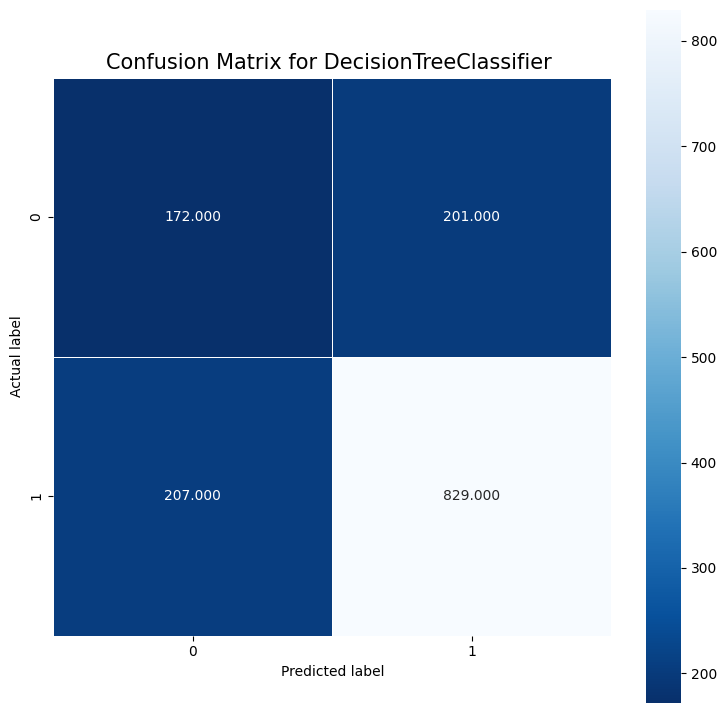

In [56]:
#Visualizing confusion metrix
Model= "DecisionTreeClassifier"
score1 = deci_tree.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for %s ' %(Model)
plt.title(all_sample_title, size = 15);

In [57]:
#Visualizing Feature Importance
feature_importance1 = deci_tree.feature_importances_
feature_importance1 = pd.DataFrame(feature_importance1, index=target_feature.columns)
feature_importance1.reset_index(inplace=True)
feature_importance1.rename(columns={'index':'Feature',0:'Score'}, inplace=True)
feature_importance1.sort_values(by ='Score',ascending = False, inplace =True )
fig= px.bar(feature_importance1, x='Feature',y ='Score')
fig.show()


# 3. RandomForest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier(max_depth=15, random_state=24)
rnd_forest.fit(X_train, y_train.values.ravel())
#Predicting
y_pred_forest = rnd_forest.predict(X_test)

In [59]:
#Checking results
from sklearn import metrics
model= "RandomForestClassifier"
Accuracy = metrics.accuracy_score(y_test, y_pred_forest)
Precision= metrics.precision_score(y_test, y_pred_forest)
Recall= metrics.recall_score(y_test, y_pred_forest)
F1= metrics.f1_score(y_test, y_pred_forest) 
F2= metrics.fbeta_score(y_test, y_pred_forest,beta=0.5) 

results = pd.DataFrame([[model,Accuracy,Precision,Recall,F1,F2]] ,columns=['Model','Accuracy','Precision','Recall','F1','F2'])
models_result = models_result.append(results,ignore_index= True)
models_result

Model  Accuracy  Precision    Recall        F1        F2
0      LogisticRegression  0.821859   0.861086  0.903475  0.881771  0.869242
1  DecisionTreeClassifier  0.710433   0.804854  0.800193  0.802517  0.803918
2  RandomForestClassifier  0.798439   0.831570  0.910232  0.869124  0.846195

In [60]:
report3 = classification_report(y_test, y_pred_forest, target_names=['Churned','Stayed'])
print(report3)

              precision    recall  f1-score   support

     Churned       0.66      0.49      0.56       373
      Stayed       0.83      0.91      0.87      1036

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



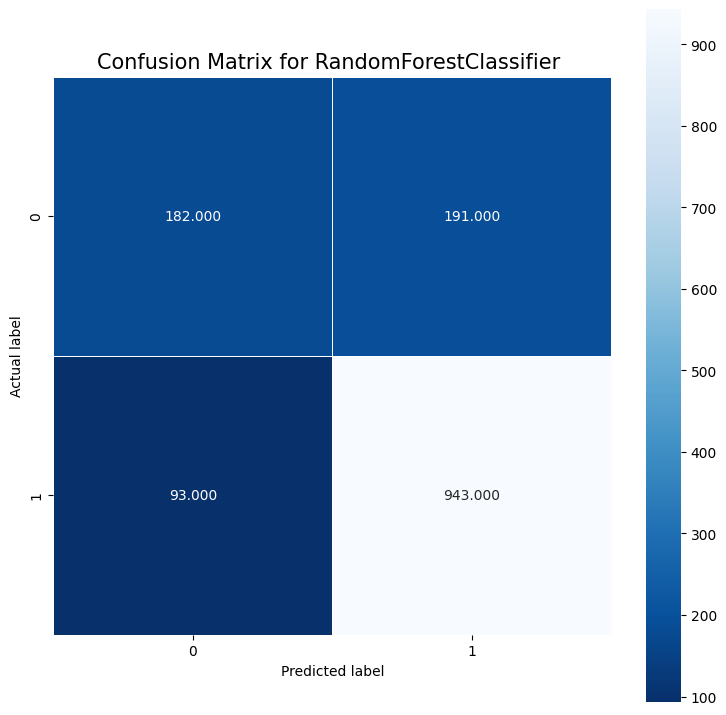

In [61]:
#Visualizing confusion metrix
Model= 'RandomForestClassifier'
score3 = rnd_forest.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for %s ' %(Model)
plt.title(all_sample_title, size = 15);

In [62]:
#Visualizing Feature Importance
feature_importance2 = rnd_forest.feature_importances_
feature_importance2 = pd.DataFrame(feature_importance2, index=target_feature.columns)
feature_importance2.reset_index(inplace=True)
feature_importance2.rename(columns={'index':'Feature',0:'Score'}, inplace=True)
feature_importance2.sort_values(by ='Score',ascending = False, inplace =True )
fig= px.bar(feature_importance2, x='Feature',y ='Score')
fig.show()


# 4. XGB Classifier Model


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
grd_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,random_state=10)
grd_boost.fit(X_train, y_train.values.ravel())

#Predicting
y_pred_boost = grd_boost.predict(X_test)


In [64]:
#Checking results
from sklearn import metrics
model= "GradientBoostingClassifier"
Accuracy = metrics.accuracy_score(y_test, y_pred_boost)
Precision= metrics.precision_score(y_test, y_pred_boost)
Recall= metrics.recall_score(y_test, y_pred_boost)
F1= metrics.f1_score(y_test, y_pred_boost) 
F2= metrics.fbeta_score(y_test, y_pred_boost,beta=0.5) 

results = pd.DataFrame([[model,Accuracy,Precision,Recall,F1,F2]] ,columns=['Model','Accuracy','Precision','Recall','F1','F2'])
models_result = models_result.append(results,ignore_index= True)
models_result

Model  Accuracy  Precision    Recall        F1  \
0          LogisticRegression  0.821859   0.861086  0.903475  0.881771   
1      DecisionTreeClassifier  0.710433   0.804854  0.800193  0.802517   
2      RandomForestClassifier  0.798439   0.831570  0.910232  0.869124   
3  GradientBoostingClassifier  0.770759   0.829178  0.866795  0.847570   

         F2  
0  0.869242  
1  0.803918  
2  0.846195  
3  0.836438

In [65]:
report4 = classification_report(y_test, y_pred_boost, target_names=['Churned','Stayed'])
print(report4)

              precision    recall  f1-score   support

     Churned       0.58      0.50      0.54       373
      Stayed       0.83      0.87      0.85      1036

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.77      1409



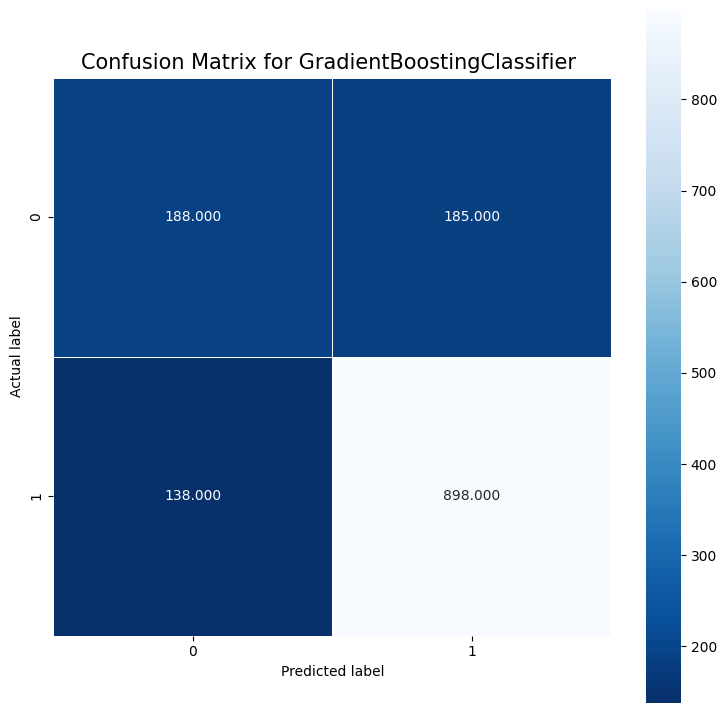

In [66]:
#Visualizing confusion metrix
Model = 'GradientBoostingClassifier'
score4 = rnd_forest.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred_boost)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for %s ' %(Model)
plt.title(all_sample_title, size = 15);

In [67]:
#Visualizing Feature Importance
feature_importance4 = grd_boost.feature_importances_
feature_importance4 = pd.DataFrame(feature_importance4, index=target_feature.columns)
feature_importance4.reset_index(inplace=True)
feature_importance4.rename(columns={'index':'Feature',0:'Score'}, inplace=True)
feature_importance4.sort_values(by ='Score',ascending = False, inplace =True )
fig= px.bar(feature_importance4, x='Feature',y ='Score')
fig.show()


# Modeling with Balanced data

In [68]:
#Fitting the model
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression(random_state= 24 ,solver='liblinear')
#logi_reg = LogisticRegression()
logi_reg.fit(X_train_resample, y_train_resample.values.ravel())

#Predicting
y_pred_resample = logi_reg.predict(X_test_resample)
#Checking results
from sklearn import metrics
model= "LogisticRegression_onBalanced"
Accuracy = metrics.accuracy_score(y_test_resample, y_pred_resample)
Precision= metrics.precision_score(y_test_resample, y_pred_resample)
Recall= metrics.recall_score(y_test_resample, y_pred_resample)
F1= metrics.f1_score(y_test_resample, y_pred_resample) 
F2= metrics.fbeta_score(y_test_resample, y_pred_resample,beta=0.5) 

results = pd.DataFrame([[model,Accuracy,Precision,Recall,F1,F2]] ,columns=['Model','Accuracy','Precision','Recall','F1','F2'])
models_result = models_result.append(results,ignore_index= True)
models_result

Model  Accuracy  Precision    Recall        F1  \
0             LogisticRegression  0.821859   0.861086  0.903475  0.881771   
1         DecisionTreeClassifier  0.710433   0.804854  0.800193  0.802517   
2         RandomForestClassifier  0.798439   0.831570  0.910232  0.869124   
3     GradientBoostingClassifier  0.770759   0.829178  0.866795  0.847570   
4  LogisticRegression_onBalanced  0.738112   0.738112  1.000000  0.849326   

         F2  
0  0.869242  
1  0.803918  
2  0.846195  
3  0.836438  
4  0.778910

In [69]:
from sklearn.tree import DecisionTreeClassifier
deci_tree = DecisionTreeClassifier(random_state=24)
#deci_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 4 , max_features=0.6)
deci_tree.fit(X_train_resample, y_train_resample)
#Predicting
y_pred_tree_resample = deci_tree.predict(X_test_resample)
#Checking results
from sklearn import metrics
model= "DecisionTreeClassifier_onBalanced"
Accuracy = metrics.accuracy_score(y_test_resample, y_pred_tree_resample)
Precision= metrics.precision_score(y_test_resample, y_pred_tree_resample)
Recall= metrics.recall_score(y_test_resample, y_pred_tree_resample)
F1= metrics.f1_score(y_test_resample, y_pred_tree_resample) 
F2= metrics.fbeta_score(y_test_resample, y_pred_tree_resample,beta=0.5) 

results = pd.DataFrame([[model,Accuracy,Precision,Recall,F1,F2]] ,columns=['Model','Accuracy','Precision','Recall','F1','F2'])
models_result = models_result.append(results,ignore_index= True)
models_result


Model  Accuracy  Precision    Recall        F1  \
0                 LogisticRegression  0.821859   0.861086  0.903475  0.881771   
1             DecisionTreeClassifier  0.710433   0.804854  0.800193  0.802517   
2             RandomForestClassifier  0.798439   0.831570  0.910232  0.869124   
3         GradientBoostingClassifier  0.770759   0.829178  0.866795  0.847570   
4      LogisticRegression_onBalanced  0.738112   0.738112  1.000000  0.849326   
5  DecisionTreeClassifier_onBalanced  0.738112   0.738112  1.000000  0.849326   

         F2  
0  0.869242  
1  0.803918  
2  0.846195  
3  0.836438  
4  0.778910  
5  0.778910

In [74]:
grd_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,random_state=10)
grd_boost.fit(X_train_resample, y_train_resample.values.ravel())

#Predicting
y_pred_boost_resample = grd_boost.predict(X_test_resample)
#Checking results
from sklearn import metrics
model= "GradientBoostingClassifier_onBalanced"
Accuracy = metrics.accuracy_score(y_test_resample, y_pred_boost_resample)
Precision= metrics.precision_score(y_test_resample, y_pred_boost_resample)
Recall= metrics.recall_score(y_test_resample, y_pred_boost_resample)
F1= metrics.f1_score(y_test_resample, y_pred_boost_resample) 
F2= metrics.fbeta_score(y_test_resample, y_pred_boost_resample,beta=0.5) 

results = pd.DataFrame([[model,Accuracy,Precision,Recall,F1,F2]] ,columns=['Model','Accuracy','Precision','Recall','F1','F2'])
models_result = models_result.append(results,ignore_index= True)
models_result


Model  Accuracy  Precision    Recall  \
0                     LogisticRegression  0.821859   0.861086  0.903475   
1                 DecisionTreeClassifier  0.710433   0.804854  0.800193   
2                 RandomForestClassifier  0.798439   0.831570  0.910232   
3             GradientBoostingClassifier  0.770759   0.829178  0.866795   
4          LogisticRegression_onBalanced  0.738112   0.738112  1.000000   
5      DecisionTreeClassifier_onBalanced  0.738112   0.738112  1.000000   
6  GradientBoostingClassifier_onBalanced  0.738112   0.738112  1.000000   

         F1        F2  
0  0.881771  0.869242  
1  0.802517  0.803918  
2  0.869124  0.846195  
3  0.847570  0.836438  
4  0.849326  0.778910  
5  0.849326  0.778910  
6  0.849326  0.778910

In [70]:
models_result

Model  Accuracy  Precision    Recall        F1  \
0                 LogisticRegression  0.821859   0.861086  0.903475  0.881771   
1             DecisionTreeClassifier  0.710433   0.804854  0.800193  0.802517   
2             RandomForestClassifier  0.798439   0.831570  0.910232  0.869124   
3         GradientBoostingClassifier  0.770759   0.829178  0.866795  0.847570   
4      LogisticRegression_onBalanced  0.738112   0.738112  1.000000  0.849326   
5  DecisionTreeClassifier_onBalanced  0.738112   0.738112  1.000000  0.849326   

         F2  
0  0.869242  
1  0.803918  
2  0.846195  
3  0.836438  
4  0.778910  
5  0.778910

# Cross Validation

In [80]:
from sklearn.model_selection import KFold,cross_val_score
from numpy import std, mean
model =logi_reg
kf = KFold(n_splits=50, random_state=10, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.800 (0.042)


# Model Optimization

# Hyperparameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings('ignore')
params1 = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10,12],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}
params2 = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
    'C'       : np.logspace(-3,3,7,9,15),
    'solver'  : ['liblinear','newton-cg', 'lbfgs','sag','saga'],
}


clf1 = GridSearchCV(
    estimator=deci_tree,
    param_grid=params1,
    cv=5,
    n_jobs=5,
    verbose=1,
)
clf2 = GridSearchCV(
    estimator=logi_reg,
    param_grid=params2,
    cv=5,
    n_jobs=5,
    verbose=1,
)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

print(clf1.best_params_)
print(clf2.best_params_)

Fitting 15 folds for each of 196 candidates, totalling 2940 fits
Fitting 15 folds for each of 140 candidates, totalling 2100 fits
{'criterion': 'gini', 'max_depth': 4, 'max_features': 0.8, 'splitter': 'best'}
{'C': 225.0, 'penalty': 'l2', 'solver': 'sag'}


In [83]:
#Fitting the model with tuned parameters
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression(random_state= 24 ,C= 225.0, penalty= 'l2', solver= 'sag')
logi_reg.fit(X_train, y_train.values.ravel())

#Predicting
y_pred_tuned = logi_reg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tuned)) 
print("Precision:",metrics.precision_score(y_test, y_pred_tuned)) 
print("Recall:",metrics.recall_score(y_test, y_pred_tuned)) 
print("F1:",metrics.f1_score(y_test, y_pred_tuned)) 
print("F2:",metrics.fbeta_score(y_test, y_pred_tuned,beta=0.5)) 

Accuracy: 0.8190205819730305
Precision: 0.8599078341013825
Recall: 0.9005791505791506
F1: 0.8797736916548797
F2: 0.8677455357142857


# Future Prediction